# Green Routes JAE Intro ICU Notebook

In [1]:
import osmnx as ox
from IPython.display import Image
import networkx as nx
import numpy as np

ox.config(log_console=True)
ox.__version__

'1.1.1'

### Some pre-config

In [3]:
img_folder = "images"
extension = "png"
size = 240
dpi = 40

### Selecting the place

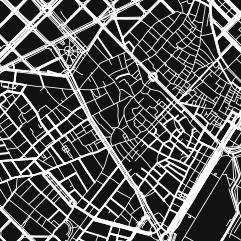

In [4]:
place = "ciutat-vella"
point = (41.382850, 2.174192)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="all",
    default_width=3.3,
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

### Creating the network from coordinates

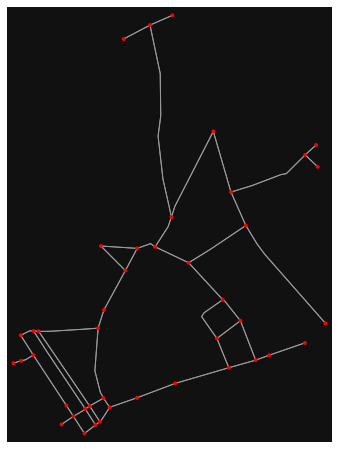

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
G = ox.graph_from_point(point, dist=200, network_type="walk", dist_type="network")
ox.plot_graph(G, node_color="r")

### Getting basic stats

In [6]:
stats = ox.basic_stats(G)
stats

{'n': 43,
 'm': 106,
 'k_avg': 4.930232558139535,
 'edge_length_total': 3081.072000000001,
 'edge_length_avg': 29.066716981132085,
 'streets_per_node_avg': 3.255813953488372,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 32, 4: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.7441860465116279,
  4: 0.2558139534883721},
 'intersection_count': 43,
 'street_length_total': 1540.5360000000005,
 'street_segment_count': 53,
 'street_length_avg': 29.066716981132085,
 'circuity_avg': 1.0111445390654328,
 'self_loop_proportion': 0.0}

### Getting shortest path between two nodes based on distance

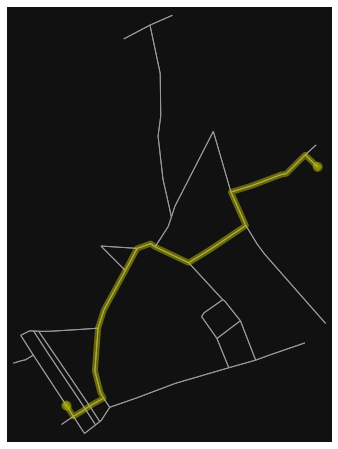

In [19]:
orig = list(G)[1]
dest = list(G)[28]
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

### Calculate two routes by minimizing travel distance vs travel time

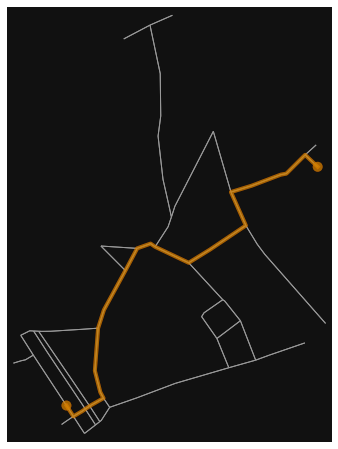

In [20]:
route1 = ox.shortest_path(G, orig, dest, weight="length")
route2 = ox.shortest_path(G, orig, dest, weight="travel_time")

# plot the routes
fig, ax = ox.plot_graph_routes(
    G, routes=[route1, route2], route_colors=["r", "y"], route_linewidth=6, node_size=0
)

### Plotting the street network with Folium

In [21]:
from IPython.display import IFrame
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")

# save as html file then display map as an iframe
filepath = "data/graph.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

### Getting nodes and edges

In [22]:
nodes, edges = ox.graph_to_gdfs(G)

In [23]:
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
30243954,41.383020,2.175276,3,NaN,POINT (2.17528 41.38302)
30243955,41.382939,2.175388,3,NaN,POINT (2.17539 41.38294)
30252194,41.381382,2.173765,3,NaN,POINT (2.17376 41.38138)
30252195,41.381479,2.174109,3,NaN,POINT (2.17411 41.38148)
30252196,41.381585,2.174590,4,NaN,POINT (2.17459 41.38159)
30252197,41.381636,2.174831,3,NaN,POINT (2.17483 41.38164)
30252198,41.381752,2.175273,3,NaN,POINT (2.17527 41.38175)
30252208,41.382405,2.173441,3,NaN,POINT (2.17344 41.38241)
30252209,41.382240,2.173661,3,NaN,POINT (2.17366 41.38224)


In [24]:
edges

osmid  \
u          v          key                           
30243954   30243955   0                   4745581   
           359115390  0                  19922498   
           30647211   0      [19922498, 19922468]   
30243955   30243954   0                   4745581   
30252194   30252195   0                 126334602   
...                                           ...   
8246157429 3497472682 0    [126334628, 342792631]   
           8246157427 0                 886807542   
8246157431 104438411  0                 126334625   
           8246157429 0                 886807542   
           194551073  0    [126334625, 342792626]   

                                                                       name  \
u          v          key                                                     
30243954   30243955   0                          Carrer de Salomó ben Adret   
           359115390  0                                Carrer de Sant Sever   
           30647211   0    [Baixada de Santa Eulàlia, Carrer de Sant Sever]   
30243955   30243954   0                          Carrer de Salomó ben Adret   
30252194   30252195   0                               Carrer de la Boqueria   
...                                                                     ...   
8246157429 3497472682 0                   [Plaça de la Boqueria, La Rambla]   
           8246157427 0                                           La Rambla   
8246157431 104438411  0                                           La Rambla   
           8246157429 0                                           La Rambla   
           194551073  0                   [Plaça de la Boqueria, La Rambla]   

                                         highway  oneway  length  \
u          v          key                                          
30243954   30243955   0               pedestrian   False  12.955   
           359115390  0               pedestrian   False  11.106   
           30647211   0               pedestrian   False  63.711   
30243955   30243954   0               pedestrian   False  12.955   
30252194   30252195   0               pedestrian   False  30.668   
...                                          ...     ...     ...   
8246157429 3497472682 0    [footway, pedestrian]   False  11.923   
           8246157427 0                  footway   False  67.927   
8246157431 104438411  0                  footway   False   4.052   
           8246157429 0                  footway   False  13.857   
           194551073  0    [footway, pedestrian]   False  13.080   

                                                                    geometry  \
u          v          key                                                      
30243954   30243955   0      LINESTRING (2.17528 41.38302, 2.17539 41.38294)   
           359115390  0      LINESTRING (2.17528 41.38302, 2.17537 41.38309)   
           30647211   0    LINESTRING (2.17528 41.38302, 2.17511 41.38289...   
30243955   30243954   0      LINESTRING (2.17539 41.38294, 2.17528 41.38302)   
30252194   30252195   0      LINESTRING (2.17376 41.38138, 2.17411 41.38148)   
...                                                                      ...   
8246157429 3497472682 0    LINESTRING (2.17334 41.38133, 2.17335 41.38133...   
           8246157427 0    LINESTRING (2.17334 41.38133, 2.17316 41.38153...   
8246157431 104438411  0      LINESTRING (2.17343 41.38122, 2.17339 41.38120)   
           8246157429 0      LINESTRING (2.17343 41.38122, 2.17334 41.38133)   
           194551073  0    LINESTRING (2.17343 41.38122, 2.17344 41.38123...   

                          maxspeed tunnel  
u          v          key                  
30243954   30243955   0        NaN    NaN  
           359115390  0        NaN    NaN  
           30647211   0        NaN    NaN  
30243955   30243954   0        NaN    NaN  
30252194   30252195   0        NaN    NaN  
...                            ...    ...  
8246157429 3497472682 0        NaN    NaN  
    

### Creating two random AQI weights

In [29]:
edges['AQI_1'] = np.random.randint(1, 500, edges.shape[0])
edges['AQI_2'] = np.random.randint(1, 10000, edges.shape[0])

In [30]:
edges.head(3)

osmid  \
u        v         key                         
30243954 30243955  0                 4745581   
         359115390 0                19922498   
         30647211  0    [19922498, 19922468]   

                                                                    name  \
u        v         key                                                     
30243954 30243955  0                          Carrer de Salomó ben Adret   
         359115390 0                                Carrer de Sant Sever   
         30647211  0    [Baixada de Santa Eulàlia, Carrer de Sant Sever]   

                           highway  oneway  length  \
u        v         key                               
30243954 30243955  0    pedestrian   False  12.955   
         359115390 0    pedestrian   False  11.106   
         30647211  0    pedestrian   False  63.711   

                                                                 geometry  \
u        v         key                                                      
30243954 30243955  0      LINESTRING (2.17528 41.38302, 2.17539 41.38294)   
         359115390 0      LINESTRING (2.17528 41.38302, 2.17537 41.38309)   
         30647211  0    LINESTRING (2.17528 41.38302, 2.17511 41.38289...   

                       maxspeed tunnel  AQI_1  AQI_2  
u        v         key                                
30243954 30243955  0        NaN    NaN    101   8897  
         359115390 0        NaN    NaN    364   5204  
         30647211  0        NaN    NaN    244   6956

### Creating new graph including above weights

In [31]:
new_G = ox.graph_from_gdfs(nodes, edges)

### Calculate two routes by minimizing AQI_1 vs AQI_2

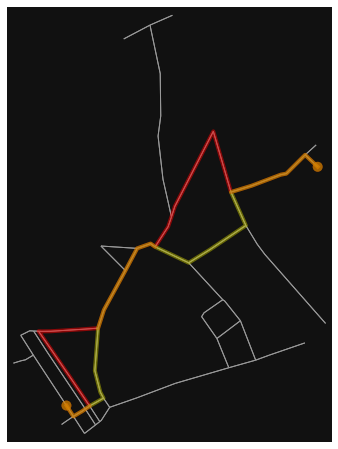

In [32]:
route1 = ox.shortest_path(new_G, orig, dest, weight="AQI_1")
route2 = ox.shortest_path(new_G, orig, dest, weight="AQI_2")

# plot the routes
fig, ax = ox.plot_graph_routes(
    new_G, routes=[route1, route2], route_colors=["r", "y"], route_linewidth=6, node_size=0
)

### Creating folium map with above route

In [33]:
m2 = ox.plot_route_folium(new_G, route1, weight=10)

filepath = "data/route.html"
m2.save(filepath)
IFrame(filepath, width=600, height=500)

### Demo function to get only the AQI from the nodes needed by Bidirectional Dijkstra 

In [34]:
import random
def get_AQI(edge_orig, edge_dest, edge_dict):
    return random.randint(0,22)

### Test the function

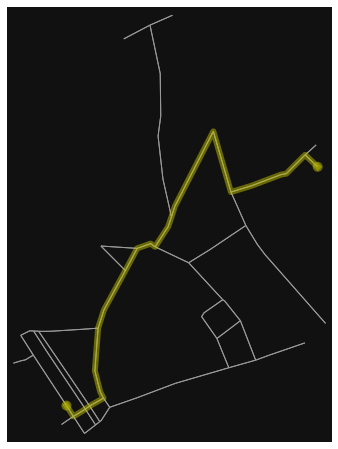

In [35]:
length, route = nx.bidirectional_dijkstra(G, orig, dest, get_AQI)
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

### Comparing path lengths

In [36]:
print(len(route1), len(route))

15 15


## Working with real data from breezometer API

### Making the request and getting the response

In [168]:
import requests
url = 'https://api.breezometer.com/air-quality/v2/current-conditions?lat=41.382850&lon=2.174192&key=22dc7a98bc4f4e7c93356538cafc6468'
response = requests.get(url)
print(response)

<Response [200]>


### Analizing the response

In [169]:
data = response.json()["data"]
data

{'datetime': '2021-10-21T11:00:00Z',
 'data_available': True,
 'indexes': {'baqi': {'display_name': 'BreezoMeter AQI',
   'aqi': 61,
   'aqi_display': '61',
   'color': '#BBE41C',
   'category': 'Good air quality',
   'dominant_pollutant': 'no2'}}}

In [170]:
data = response.json()["data"]["indexes"]["baqi"]["aqi"]
data

61

### Implementing the first real get_AQI() function

In [184]:
def get_AQI(edge_orig, edge_dest, edge_dict):
    lat, long = nodes.loc[edge_orig].y, nodes.loc[edge_orig].x
    url = 'https://api.breezometer.com/air-quality/v2/current-conditions?lat=%s&lon=%s&key=22dc7a98bc4f4e7c93356538cafc6468' % (lat, long)
    response = requests.get(url)
    AQI = response.json()["data"]["indexes"]["baqi"]["aqi"]
    return AQI
    
length, route = nx.bidirectional_dijkstra(G, orig, dest, get_AQI)

ConnectionError: HTTPSConnectionPool(host='api.breezometer.com', port=443): Max retries exceeded with url: /air-quality/v2/current-conditions?lat=41.3826008&lon=2.1740746&key=22dc7a98bc4f4e7c93356538cafc6468 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f725060cf70>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

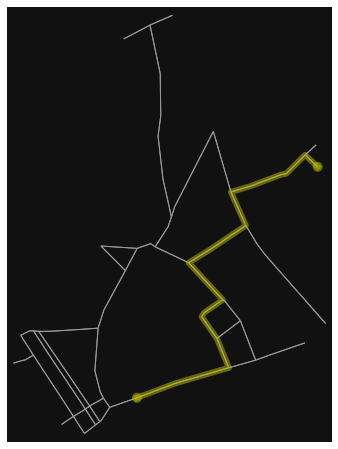

In [185]:
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)